# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 obervations.

#### Question 2. Create a summary table

In [5]:
#summary table
df_raw.describe()

C:\Users\Molly\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range is a lot larger.

#### Question 4. Drop data points with missing data


In [6]:
df=df_raw.dropna()

In [7]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [8]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [9]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [10]:
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: All the missing data has been removed because, the df.isnull().sum() function would have returned something greater than 0 if there had been data points that were null.

#### Question 6. Create box plots for GRE and GPA

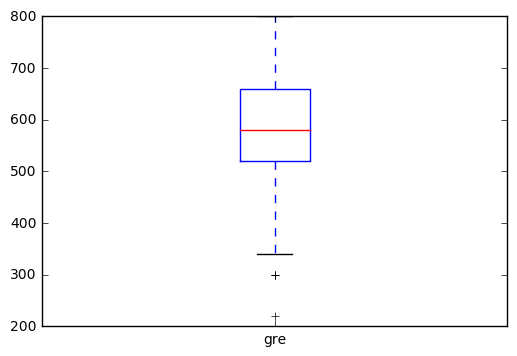

In [11]:
#gre boxplot
df[['gre']].plot(kind='box');

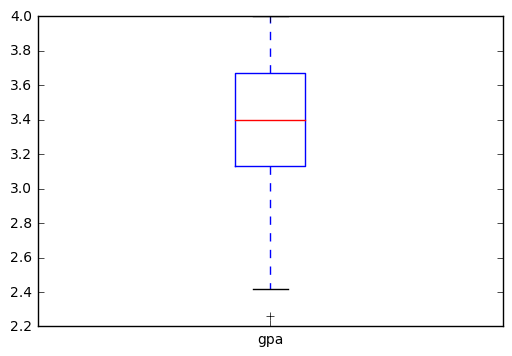

In [12]:
#gpa boxplot
df[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: The plots show the median, 1st quartile, 3rd quartile and and any outliers for the data.  It's a way to visualize the distribution of the data.

#### Question 8. Describe each distribution 

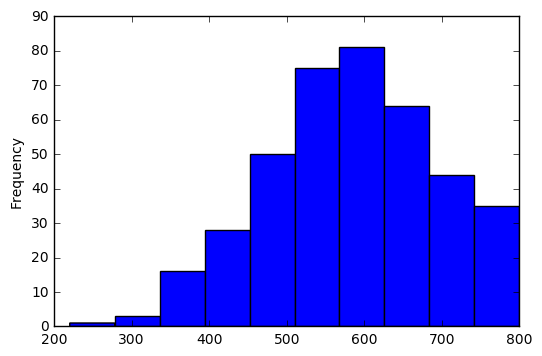

In [13]:
# plot the distribution of each variable 
df.gre.plot(kind='hist');

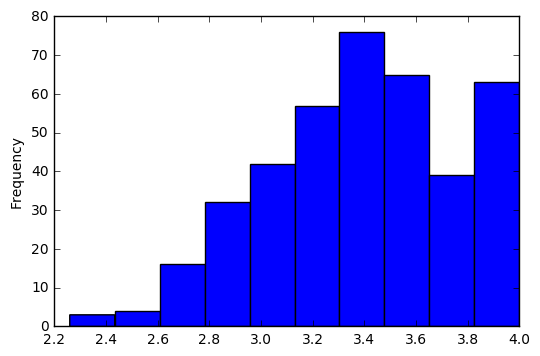

In [14]:
df.gpa.plot(kind='hist');

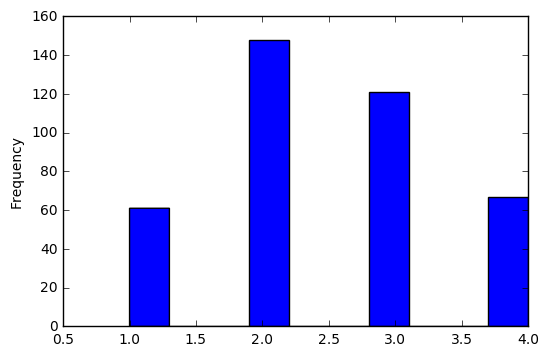

In [15]:
df.prestige.plot(kind='hist');

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: According to the normal test, gpa is normally distributed and gre is not. Because prestige is an ordinal variable, it can't be normally distributed.

In [16]:
from scipy.stats import normaltest
normaltest(df['gpa'])

NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)

In [17]:
normaltest(df['gre'])

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: After taking the log of gpa and gre, the p-values of the normal tests are both smaller and gre is now normally distributed.

In [18]:
log_columns = ['gpa', 'gre',]
log_df = df.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [19]:
log_df.head()

,admit,gre,gpa,prestige
0,0,2.579784,0.557507,3.0
1,1,2.819544,0.564666,3.0
2,1,2.903090,0.602060,1.0
3,1,2.806180,0.503791,4.0
4,0,2.716003,0.466868,4.0


In [21]:
normaltest(log_df['gpa'])

NormaltestResult(statistic=14.387731469612996, pvalue=0.00075117963919804696)

In [22]:
normaltest(log_df['gre'])

NormaltestResult(statistic=39.990354623097389, pvalue=2.0711179322781024e-09)

#### Question 11. Which of our variables are potentially colinear? 

In [19]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the variables have strong correlations with each other.  The results of the correlation matrix are not close to 1 or -1.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Create 3 dummy variables for prestige since it is an ordinal variable with 4 categories.
2. Create a linear model looking at the 3 new prestige variables. The intercept captures the effect of the 4th category which does not have a dummy variable.
3. If the p values for the coefficients are sufficiently small, less than 0.05, and the confidence intervals of all the vaiables do not contain zero, then the linear model is a good fit for the association, if they are not another model should be tested.

#### Question 14. What is your hypothesis? 

Answer: Students who went to more prestigious undergraduate schools are more likely to be admitted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data